## 2.3 Кластеризация  набора данных 

загрузка библиотек

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")
from matplotlib import cm
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
from math import *
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

from sklearn import metrics

загружаем данные 

In [3]:
data  = pd.read_csv('data_base.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416935 entries, 0 to 2416934
Data columns (total 36 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Unnamed: 0                        int64  
 1   date                              object 
 2   hour                              int64  
 3   line                              object 
 4   station                           object 
 5   num_val                           int64  
 6   line_id                           int64  
 7   line_name                         object 
 8   station_id                        int64  
 9   entry_id                          int64  
 10  entry_name                        object 
 11  input_doors_count                 int64  
 12  input_doors_bandwidth             float64
 13  input_doors_total_bandwidth       float64
 14  input_turnstile_count             int64  
 15  input_turnstile_bandwidth         float64
 16  input_turnstile_total_bandwidth   fl

In [5]:
data_for_clst = data[['hour' , 'num_val' , 'line_id' , 'station_id' , 'entry_id']]

так как  большинство  методов  кластеризации требуют много вычислений , а так же памяти оставить все колонки  будет вичислительно  не выгодно
,поэтому  оставим  как можно больше  показателей , которые  смогут охарактертизовать поезду , час , кол-во  пассажиров , и айди  станций линии и входа

In [6]:
data_for_clst

,hour,num_val,line_id,station_id,entry_id
0,0,373,12,131,5
1,1,6,12,131,5
2,2,1,12,131,5
3,3,2,12,131,5
4,5,38,12,131,5
...,...,...,...,...,...
2416930,19,1757,15,251,5
2416931,20,1132,15,251,5
2416932,21,627,15,251,5
2416933,22,360,15,251,5


перед любой  кластеризацией  нужно  отцентрировать данные  , чтобы уменьшить вычислительную  сложность  и сделать алгоритм  устойчивым

In [7]:
ss = StandardScaler()
X = ss.fit_transform(data_for_clst)


Алгоритм k-means (k-средних)

Наиболее простой, но в то же время достаточно неточный метод кластеризации в классической реализации. Он разбивает множество элементов векторного пространства на заранее известное число кластеров k. Действие алгоритма таково, что он стремится минимизировать среднеквадратичное отклонение на точках каждого кластера. Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике. Алгоритм завершается, когда на какой-то итерации не происходит изменения кластеров. 

так же из-за проклятья  размерности  использовать  алгоритм  к ближайщих  на данных с размером  больше чем  2 будет  сложно  

In [8]:
km = KMeans(n_clusters = 3, init = 'k-means++' , max_iter = 500, n_init = 25, random_state = 42)
y_means= km.fit_predict(X)
data['Clusters_km'] = km.predict(X)

визуализация 

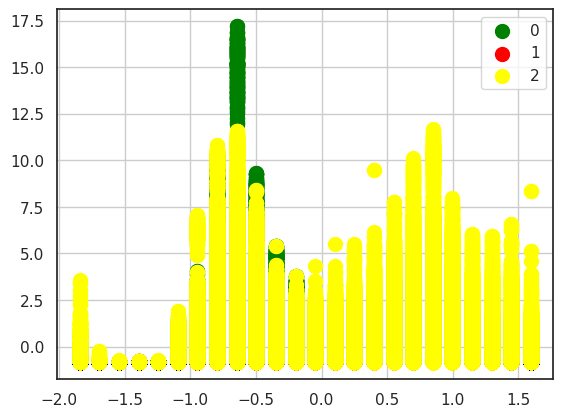

In [9]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'green', label = '0')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'yellow', label = '2')

 
plt.title('', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

как видно  одного  из кластера не  видно  и они  сложно отличимы друг от друга 

про этот метод сводку алгоритма  я давтаь не буду так как не очень знаком  с  точным  алгоритмом , но я выбрал этот способ  , так как относительно всех других  методов  вызывает  меньшую нагрузку на систему 

In [10]:
gm = GaussianMixture(n_components = 3)
y_means= gm.fit_predict(X)
data['Clusters_gm'] = gm.predict(X)

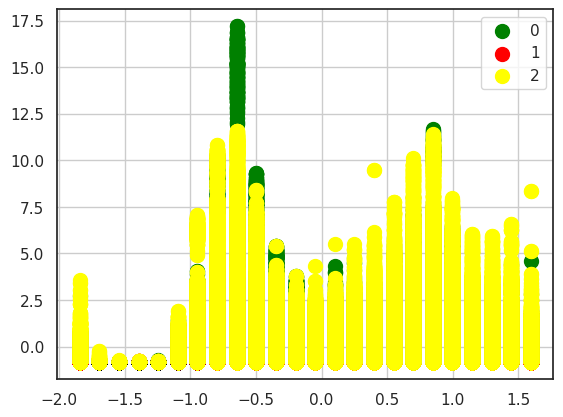

In [11]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'green', label = '0')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'yellow', label = '2')

 
plt.title('', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

примерно  такая же история , что и с  к-means

In [12]:
from sklearn.cluster import AffinityPropagation

In [15]:
ap =  AffinityPropagation()
y_means= ap.fit_predict(X)
data['Clusters_ap'] = ap.predict(X)

MemoryError: Unable to allocate 42.5 TiB for an array with shape (2416935, 2416935) and data type float64

все остальные  методы  кластеризация или даже  визуализации (3д плоскости)  не запускались , так  что  как третий  алгоритм  я  выбрал 
AffinityPropagation так как это был мой последний вариант  , которые я пробовал из  оставшихся алгоритмов  

## 2.4 Вычисление  показателей  производительности  кластеризации 

для вычисления  показателей я  выбрал  две метрики  


Индекс  Дэвиса болдин  - этот индекс означает среднее «сходство» между кластерами, где сходство — это мера, которая сравнивает расстояние между кластерами с размером самих кластеров.

Ноль — это наименьший возможный результат. Значения, близкие к нулю, указывают на лучшее разделение.
выбрал  я его потому что;

- Вычисление Дэвиса-Боулдина проще, чем оценка Силуэта.
- В индексе вычисляются только количества и характеристики, присущие набору данных


Индекс   Калински-Харабаса -индекс представляет собой отношение суммы дисперсии между кластерами и дисперсии внутри кластера для всех кластеров (где дисперсия определяется как сумма квадратов расстояний)
и выбрал я его потому что  

- Оценка выше, когда кластеры плотные и хорошо разделенные, что относится к стандартной концепции кластера.


In [22]:


from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Оценка производительности для KMeans
davies_bouldin_km = davies_bouldin_score(X, data['Clusters_km'])
calinski_harabasz_km = calinski_harabasz_score(X, data['Clusters_km'])

print("Показатели производительности для KMeans:")
print(f"Индекс Дэвиса-Болдина: {davies_bouldin_km}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz_km}")

# Оценка производительности для Gaussian Mixture
davies_bouldin_gm = davies_bouldin_score(X, data['Clusters_gm'])
calinski_harabasz_gm = calinski_harabasz_score(X, data['Clusters_gm'])

print("\nПоказатели производительности для Gaussian Mixture:")
print(f"Индекс Дэвиса-Болдина: {davies_bouldin_gm}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz_gm}")



Показатели производительности для KMeans:
Индекс Дэвиса-Болдина: 0.998430962799879
Индекс Калински-Харабаса: 899552.0749967729

Показатели производительности для Gaussian Mixture:
Индекс Дэвиса-Болдина: 1.5363684021480584
Индекс Калински-Харабаса: 468473.63069135754


исходя из оценок  можно  сказать , что  к-mean показыает себя лучше  так как  индекс  дэвиса ближе  к  нулю , а индекс Калински-Харабаса выше

## 2.5 Подготовка отчета

в рамках  данного модуля  я построил  аналитическую  систему , а так же  кластеризовал  начальный  набор данных  тремя  алгоритмами  ,  провизуализировал  кластеризацию , а так же  выбрал  лучший алгоритм  исходя из  оценки  производительности  